# Assignment 2: Decision Tree



## Task 1: SKLearn Decision Tree

Let's first expolore the problem with the SKLearn Decision Tree

In [1]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()
digits.data
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

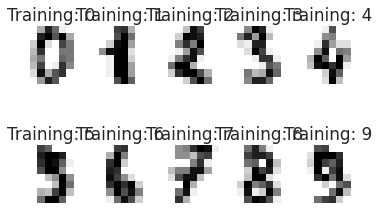

In [28]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Prepare the data for training

In [29]:
import ID3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3, random_state= 20)
X_train.data.shape
X_train

array([[ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  2., 13., ..., 16.,  9.,  0.],
       [ 0.,  0.,  2., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0., 15., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15., 10.,  0.],
       [ 0.,  0.,  8., ..., 15.,  1.,  0.]])

Let's use the Decision Tree classifier from sklearn

In [30]:
from sklearn.tree import DecisionTreeClassifier
sklearn_classifier = DecisionTreeClassifier()
sklearn_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

We can now visualize the tree created by this classifier

In [31]:
import graphviz
from sklearn.tree import export_graphviz

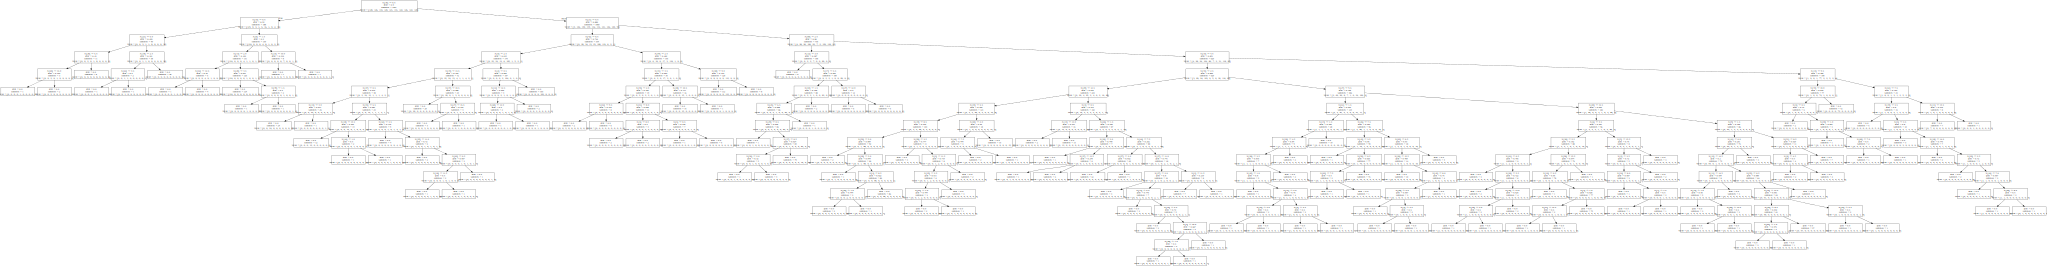

In [32]:
dot_data = export_graphviz(sklearn_classifier, out_file=None)
sklearn_tree_graph = graphviz.Source(dot_data)
sklearn_tree_graph

ue = [3, 89, 94, 103, 9, 5, 0, 26, 116, 84]'),
 Text(155.97287234042554, 142.695, 'X[29] <= 12.5\ngini = 0.676\nsamples = 223\nvalue = [0, 20, 4, 95, 2, 4, 0, 2, 16, 80]'),
 Text(142.46808510638297, 129.10500000000002, 'X[34] <= 5.5\ngini = 0.425\nsamples = 121\nvalue = [0, 4, 2, 90, 0, 2, 0, 0, 15, 8]'),
 Text(132.97021276595746, 115.515, 'X[19] <= 8.5\ngini = 0.232\nsamples = 103\nvalue = [0, 3, 2, 90, 0, 2, 0, 0, 0, 6]'),
 Text(125.8468085106383, 101.925, 'X[59] <= 5.0\ngini = 0.084\nsamples = 92\nvalue = [0, 0, 1, 88, 0, 0, 0, 0, 0, 3]'),
 Text(123.47234042553193, 88.33500000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 2]'),
 Text(128.22127659574468, 88.33500000000001, 'X[28] <= 5.0\ngini = 0.044\nsamples = 90\nvalue = [0, 0, 1, 88, 0, 0, 0, 0, 0, 1]'),
 Text(125.8468085106383, 74.745, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(130.59574468085106, 74.745, 'X[4] <= 8.5\ngini = 0.022\nsamples = 89\nvalue = [0, 0, 0, 88, 0, 0, 0,

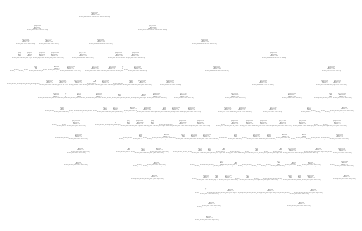

In [33]:
from sklearn.tree import plot_tree
plot_tree(sklearn_classifier);

The tree is broad and deep. Let's evaluate it using the classification report

Classification report for classifier Sklearn DT: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.82      0.80      0.81        56
           2       0.81      0.68      0.74        44
           3       0.80      0.83      0.81        63
           4       0.71      0.83      0.77        60
           5       0.91      0.82      0.87        51
           6       0.93      0.85      0.88        59
           7       0.78      0.79      0.79        53
           8       0.75      0.77      0.76        52
           9       0.75      0.81      0.78        52

    accuracy                           0.81       540
   macro avg       0.82      0.81      0.81       540
weighted avg       0.82      0.81      0.82       540




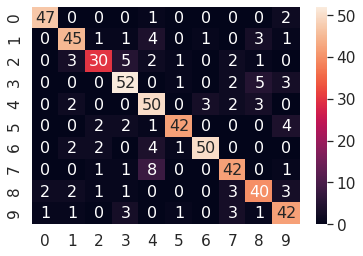

In [40]:
from sklearn import metrics
import seaborn as sn

def print_classification_report(classifier, classifier_name, true_label, predictions):
    print('Classification report for classifier %s: \n %s\n' %(classifier_name,metrics.classification_report(true_label, predictions)))

    confusion_matrix = metrics.confusion_matrix(true_label, predictions)
    sn.set(font_scale=1.4)
    sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16})
    plt.show()

print_classification_report(id3_classifier, "Sklearn DT", y_test, sklearn_classifier.predict(X_test))

On the training data

Classification report for classifier Sklearn DT: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       131
           6       1.00      1.00      1.00       122
           7       1.00      1.00      1.00       126
           8       1.00      1.00      1.00       122
           9       1.00      1.00      1.00       128

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257




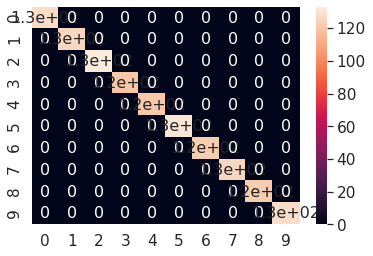

In [35]:
print_classification_report(sklearn_classifier, "Sklearn DT", y_train, sklearn_classifier.predict(X_train))

We can see that the best prcision is on the '0' and also is for the recall.
The worst predicitions are on the 8s.
Now we can try to tweak the parameters.
First we can change the min_samples_split to be 10, this means that the minimum number of samples required to split an internal node is 10 (since we have 10 digits).

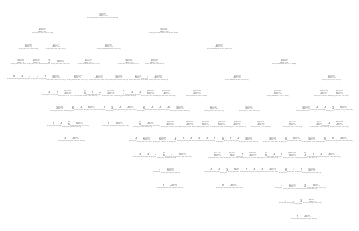

In [37]:
sklearn_classifier = DecisionTreeClassifier(min_samples_split=10)
sklearn_classifier.fit(X_train, y_train)
plot_tree(sklearn_classifier);

Classification report for classifier SKLearn DT - Min samples = 10: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.82      0.80      0.81        56
           2       0.81      0.68      0.74        44
           3       0.80      0.83      0.81        63
           4       0.71      0.83      0.77        60
           5       0.91      0.82      0.87        51
           6       0.93      0.85      0.88        59
           7       0.78      0.79      0.79        53
           8       0.75      0.77      0.76        52
           9       0.75      0.81      0.78        52

    accuracy                           0.81       540
   macro avg       0.82      0.81      0.81       540
weighted avg       0.82      0.81      0.82       540




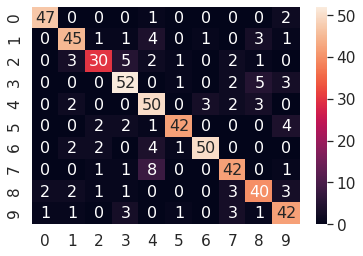

In [39]:
print_classification_report(sklearn_classifier, 'SKLearn DT - Min samples = 10', y_test, sklearn_classifier.predict(X_test))

## Task 2: ID3 Classifier

Let's fit the data to our ID3 classifier to create a model

In [18]:
id3_classifier = ID3.ID3DecisionTreeClassifier()

attributes = dict()
for i in range(len(X_train[0])):
    attributes[i] = [float(j) for j in range(17)]

id3_tree = id3_classifier.fit(X_train, y_train, attributes, digits.target_names, remaining_attributes = attributes)
predictions = id3_classifier.predict(X_test, id3_tree)

On test data

Classification report for classifier <ID3.ID3DecisionTreeClassifier object at 0x7fb5f3996550>: 
               precision    recall  f1-score   support

           0       0.48      0.74      0.58        50
           1       0.44      0.43      0.44        56
           2       0.27      0.36      0.31        44
           3       0.35      0.21      0.26        63
           4       0.48      0.50      0.49        60
           5       0.72      0.65      0.68        51
           6       0.85      0.88      0.87        59
           7       0.31      0.34      0.32        53
           8       0.23      0.17      0.20        52
           9       0.57      0.50      0.53        52

    accuracy                           0.48       540
   macro avg       0.47      0.48      0.47       540
weighted avg       0.47      0.48      0.47       540




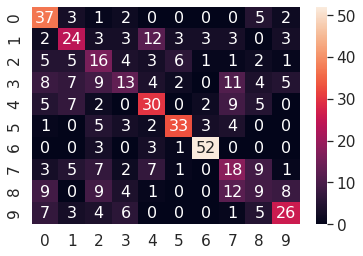

In [19]:
print_classification_report(id3_classifier, "ID3", y_test, predictions)

On training data

Classification report for classifier <ID3.ID3DecisionTreeClassifier object at 0x7fb5f3996550>: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       131
           6       1.00      1.00      1.00       122
           7       1.00      1.00      1.00       126
           8       1.00      1.00      1.00       122
           9       1.00      1.00      1.00       128

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257




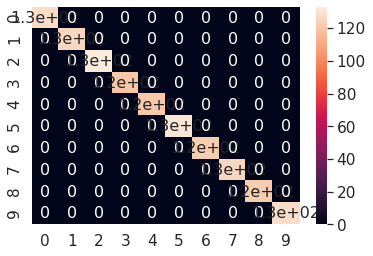

In [20]:
print_classification_report(id3_classifier, "ID3", y_train, id3_classifier.predict(X_train, id3_tree))

In [ ]:
id3_classifier = ID3.ID3DecisionTreeClassifier()

attributes = dict()
for i in range(len(X_train[0])):
    attributes[i] = [float(j) for j in range(17)]

id3_tree = id3_classifier.fit(X_train, y_train, attributes, digits.target_names, remaining_attributes = attributes)
predictions = id3_classifier.predict(X_test, id3_tree)